<a href="https://colab.research.google.com/github/aminehd/AminehTechnicalWritings/blob/main/SamplingStatsAndDistros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Outline
- Introduction (Purpose + scope)
- Body
  - sample summary statistics and examples (coefficients of fitted model)
  - load data and showcase
  - Sample responses for same set of predictors.
  - Sampling distribution of summary statistics. (use sample mean as example)
  - Expected value of summary statistics
  - Variance of summary statistic
  - Variance within a sample vs variance of a given stat over samplings
  - Standrad Error of stats and confidence interval. (SE(beta0))
  - F-test (within groups variance vs between group variance)
- Conclusion:

## Git setup and data load

In [4]:
import google.colab
repo_path = 'AminehTechnicalWritings'
!git -C $repo_path pull origin || git clone https://github.com/aminehd/AminehTechnicalWritings/ $repo_path
local_clone = '/content/' + repo_path
!git config --global user.email "amineh.dadsetan@gmail.com"
!git config --global user.name "Amineh Dadsetan"

fatal: cannot change to 'AminehTechnicalWritings': No such file or directory
Cloning into 'AminehTechnicalWritings'...
remote: Enumerating objects: 198, done.
remote: Counting objects: 100% (195/195), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 198 (delta 111), reused 140 (delta 79), pack-reused 3
Receiving objects: 100% (198/198), 3.26 MiB | 8.58 MiB/s, done.
Resolving deltas: 100% (111/111), done.


In [5]:
import numpy as np
files = np.load(local_clone + '/population.npz')
# sample = np.load(local_clone + '/sample.npy'
population = files['arr_0']
population.shape

(300000, 2)

### Summary Statistic

Previously we explained the concept of population and the concept of sample. Basically we have one population (e.g., population of American people) but we can sample a subset in many ways (e.g., sample of America people under age 18, sample of American people living in new your, etc).

In fact if N is population size, there is $2^N$ samples.

Now a statistic or measure can be defined on the whole population as well as any given sample. A statistic or a measure in mathematic is a generalization of concepts such as lenght or heigh for a given set. Since samples and the population are sets, we can define such things on them. A well known one is mean. Thus you can think of population mean or any given sample mean.

So far it was fairly easy to explain things. But it gets a bit trickier when we wanna talk about the distribution of such measures over allll samples and compare them with the value of measure on the poulation.

The motivation behind sampling is that population is too big and it is virtually impossible to calculate the mean for the whole population. Let's say as a minister of something you need the average age of your population.  It sounds quite impossible to get everybody's ages and calculate their mean.

Let's look at the population mean and sample mean for the data set we have created in previous notebooks.

But before that lets do some randome samplings of samples of size 100 that share the same predictors (`x_samples`)




In [6]:
print(population[:, 0])
len(population[:,0])
distinct_xs = np.unique(population[:, 0])
print(len(distinct_xs))
sample_size = 100
x_samp_index = np.linspace(0, len(distinct_xs)-1, sample_size).astype(int)
x_samples = distinct_xs[x_samp_index]
x_samples
n_repeat = len(population[:,0]) // len(distinct_xs)
n_repeat

[ 1.  1.  1. ... 10. 10. 10.]
30


10000

We sampled 100 distinct x and stored them in `x_samples`. There are several observations for each x in sample and thus several responses in the population. Thus we can have several sampling with given `x_samples`. Let's pick one such sample:

In [7]:
rand_gen = np.random.default_rng(2)
def sample_response(x_sams, population, rand_gen):
  for x in x_sams:
    # generate integer between 0 to n_repeat
    index = rand_gen.integers(0, n_repeat)
    yield (population[x * n_repeat + index, 0], population[x * n_repeat + index, 1],)

y_for_x_samples = np.array(list(sample_response(x_samp_index, population, rand_gen))
)


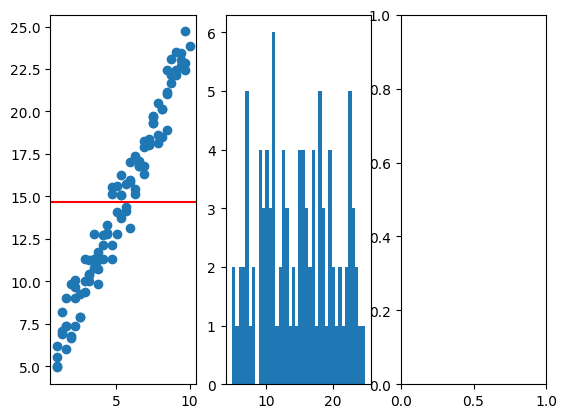

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=3)
ax[0].scatter(y_for_x_samples[:,0], y_for_x_samples[:,1] )
# ax[1] = ax[0].twinx()
# ax[1].axhlhine(y=np.mean(y_for_x_samples[:,1]), color='r')
ax[1].hist(y_for_x_samples[:,1], bins=40)
mean = np.mean(y_for_x_samples[:,1])
ax[0].axhline(y=mean, color='r')

Let's repeat the sampling for many times to collect some means.

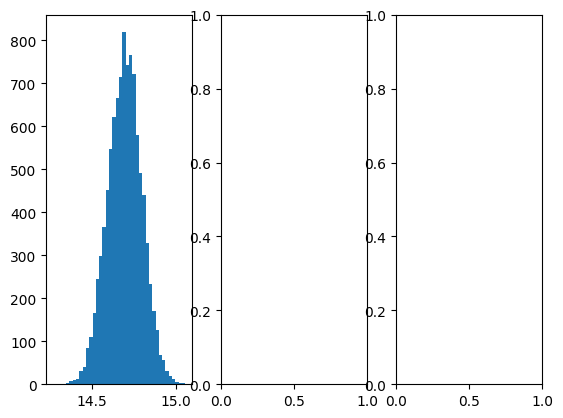

In [9]:
means = []
for i in range(10000):
  y_for_x_samples = np.array(list(sample_response(x_samp_index, population, rand_gen)))
  means.append(np.mean(y_for_x_samples[:,1]))

fig, ax = plt.subplots(ncols=3)
ax[0].hist(means, bins=40);


We have got a array of sample means.
Let's inspect into that array.

In [10]:
import pandas as pd
import pandas as pd
means = np.array(means)
df = pd.DataFrame(means)
df.describe()

,0
count,10000.000000
mean,14.695273
std,0.100274
min,14.271060
25%,14.627124
50%,14.696712
75%,14.762512
max,15.053838


The regression estimate $\beta_0$ and $\beta_1$ are also measures on the sample.


Text(0.5, 1.0, 'beta_1')

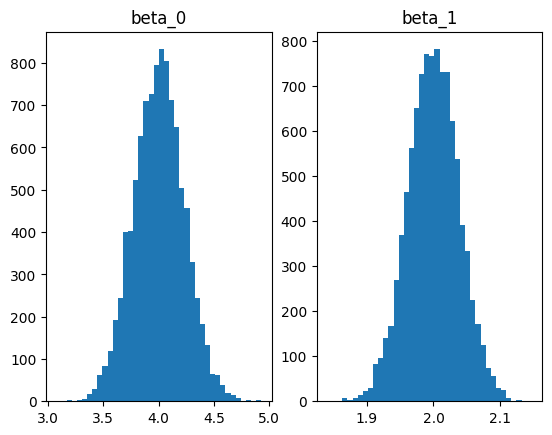

In [11]:
beta0s, beta1s = [], []
for i in range(10000):
  y_for_x_samples = np.array(list(sample_response(x_samp_index, population, rand_gen)))
  # find regression parameters
  x = y_for_x_samples[:,0]
  y = y_for_x_samples[:,1]
  beta_1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)
  beta_0 = np.mean(y) - beta_1 * np.mean(x)

  beta0s.append(beta_0)
  beta1s.append(beta_1)

fix, axes = plt.subplots(ncols=2)
axes[0].hist(beta0s, bins=40);
axes[0].set_title('beta_0')
axes[1].hist(beta1s, bins=40);
axes[1].set_title('beta_1')

Now lets calculate $\beta_0$ and $\beta_1$ for the whole population. remeber in real world this is impossible to calculate such measures on whole population


In [12]:
X = population[:, 0]
Y = population[:, 1]
beta_1 = np.sum((X - np.mean(X)) * (Y - np.mean(Y)) ) / np.sum( (X - np.mean(X))**2 )
beta_0 = np.mean(Y) - np.mean(X) * beta_1
print(beta_0, beta_1)

4.00401943432113 1.9994523815868441



We used `sample_response` method to perform 10000 sampmpling and then calculated regression parameters for each of sampling. It gives 10000 different values for $\hat{\beta_0}$'s that follows a normal distribution. Notice that mean value of the normal distro for all $\hat{\beta_0}$ is equal to the true value of $\beta_0$ calculated for the whole population. Once can interpret it as follow:

> Although value of $\beta_0$ calculated for a given sample is not very accurate. But if you sample serveral times, the mean of calculated values for $\beta_0$ is going to be equal to true value for $\beta_0$.

Now what we described above is very close to definition of Standard Error.
Standard error of a measure is the standard deviation of it's sampling distribution.

We can compute $SE(\beta_0)$ using the data `beta0s` and some python library and compare it with the value obtained from formula
$$
SE(\beta_0)^2 = \sigma^2( 1/n - \frac{\bar{x}^2}{\sum(x_i - \bar{x})^2})
$$


In [17]:
se_beta0 =  (1/len(x_samples) - (np.mean(x_samples))** 2 / np.sum((x_samples - np.mean(x_samples)) ** 2))
se_beta0
np.std(beta0s) # differentttt

0.2281767396753564


HERE!!!
Now let's look at the variance of those regression parameters over all samples. First of all here's the definition of variance. HERE!!!



https://en.wikipedia.org/wiki/Sampling_distribution
start with mu but get to beta_i HERE!!!

The concept of unbiased estimator pops up one more time. HERE!!!


Then we look at expected value of sample statistices over multiple sampling. Also we look at variance of stuff within sample, and variance of sample stat over several samplings. This indeed is an intersting case when sample stat is defined to be the mean of sample. HERE!!!




notebook we try to look at the model coefficients ( 𝛽𝑖 's ) as summary statistics defined on samples. You can also think of them as measures since samples are subsets.



These can help understand concept of Standard Error and F-test better.

HERE!!! when note book is done, create a new one to play with an np array that has shape (10, 5, 6). visualize it as 3d rubick cube. then use ix_ to slice it. talk about tensors are matrixes with more than 2 faces. also mention slicing is sorta projection. also try all three meshes listed down here. and visualize the the selection in animated way

In [ ]:

import numpy as np
faces = np.ones(shape=(10, 3, 4))

# mesh = np.ix_([0])
# mesh = np.ix_(range(10), [0], range(4))
mesh = np.ix_(range(10), range(3), [0])

sample = faces[mesh]

print(sample.shape)
sample

(10, 3, 1)


array([[[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]]])